In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('salary.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


In [7]:
print(df.columns)

Index(['Position', 'Level ', 'Salary'], dtype='object')


In [19]:
X = df[['Level ']].values   # or whatever the column is actually called
y = df['Salary'].values

In [20]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [25]:
# Linear regression (baseline)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
y_pred_lin

array([ 42084.14872798, 521555.77299413])

In [22]:
# Polynomial regression
degree = 3  
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [23]:
# Evaluation
print("Linear Model R2:", r2_score(y_test, y_pred_lin))
print("Polynomial Model (degree {}) R2:".format(degree), r2_score(y_test, y_pred_poly))
print("Polynomial Model MSE:", mean_squared_error(y_test, y_pred_poly))

Linear Model R2: -3.103241860013294
Polynomial Model (degree 3) R2: -4.9797713155065875
Polynomial Model MSE: 53967436122.44695


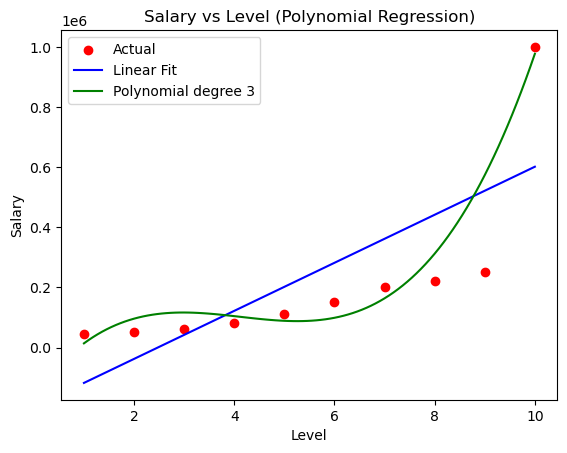

In [24]:
# Plot
plt.scatter(X, y, color='red', label='Actual')
# sorted X for nice curve plotting
X_plot = np.linspace(min(X), max(X), 100).reshape(100,1)
y_plot_poly = poly_reg.predict(poly_features.transform(X_plot))
y_plot_lin = lin_reg.predict(X_plot)

plt.plot(X_plot, y_plot_lin, color='blue', label='Linear Fit')
plt.plot(X_plot, y_plot_poly, color='green', label=f'Polynomial degree {degree}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Salary vs Level (Polynomial Regression)')
plt.legend()
plt.show()